# HR Data Visualization Analysis
### <span style="color:red">Sergio Carrazzoni de Toledo Piza</span>

Neste trabalho, foi utilizado o dataset "HR Analytics: Job Change of Data Scientists", que traz informações sobre funcionários de diferentes empresas, como o IDH de suas cidades, seu gênero, seu tempo de experiência, etc. e se eles pretendem continuar no seu emprego atual ou não.

O principal objetivo deste trabalho foi tentar descobrir padrões entre as pessoas que tem intenção de mudar de emprego ou de continuarem no seu emprego atual, por meio de diferentes métodos de análise de dados.

O dataset está disponível em https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv

In [ ]:
# Montando o drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd drive/My Drive/Visualização Computacional/hr_analytics

[Errno 2] No such file or directory: 'drive/My Drive/Visualização Computacional/hr_analytics'
/content/drive/My Drive/Visualização Computacional/hr_analytics


In [ ]:
import pandas as pd
import numpy as np
import random
random.seed(9361073)

df = pd.read_csv('preproc.csv', encoding='latin-1')
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,company_type_code,company_size_cat
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,22,2904,Public Sector,1,36,1.0,4,1000-4999
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,56,Pvt Ltd,8,47,0.0,5,50-99
2,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,64,Funded Startup,4,8,0.0,1,50-99
3,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,8,Pvt Ltd,8,18,1.0,5,<10
4,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,81,Pvt Ltd,1,46,1.0,5,50-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12534,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,307,Public Sector,3,23,0.0,4,100-499
12535,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,27,Funded Startup,1,25,0.0,1,10-49
12536,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,2636,Public Sector,1,42,1.0,4,1000-4999
12537,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,2870,Public Sector,4,52,1.0,4,1000-4999


# Carregando e pré-processando o conjunto de dados

In [ ]:
# O conjunto de dados escolhido traz a relação de dados do RH de funcionários
# https://www.kaggle.com/rhuebner/human-resources-data-set
import pandas as pd
import numpy as np

df = pd.read_csv('original.csv', encoding='latin-1')
df = df.drop(columns=['enrollee_id'])
df.company_type = df.company_type.astype('category')
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
# checando a quantidade de valores nulos por coluna
df.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
# criando novo dataframe removendo as linhas com valores nulos
df2 = df.dropna()
df2

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1,100-500,Pvt Ltd,1,52,1.0
19149,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19150,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
19152,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0


## Estatísticas Básicas

In [ ]:
df.describe()

,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000
mean,0.828848,65.366896,0.249348
std,0.123362,60.058462,0.432647
min,0.448000,1.000000,0.000000
25%,0.740000,23.000000,0.000000
50%,0.903000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


In [ ]:
df2.describe()

,city_development_index,training_hours,target
count,8955.000000,8955.000000,8955.000000
mean,0.844570,65.074930,0.165606
std,0.116178,60.235087,0.371747
min,0.448000,1.000000,0.000000
25%,0.794000,23.000000,0.000000
50%,0.910000,47.000000,0.000000
75%,0.920000,88.000000,0.000000
max,0.949000,336.000000,1.000000


Podemos ver que a média do target caiu de `0.249` para `0.165`, o que é uma queda considerável. Neste caso, temos que priorizar o preenchimento dos valores nulos nas linhas onde o valor de `target = 1`

In [ ]:
df[df['target'].isin([1])].isna().sum()

city                         0
city_development_index       0
gender                    1389
relevent_experience          0
enrolled_university        123
education_level            104
major_discipline           549
experience                  23
company_size              2410
company_type              2384
last_new_job               154
training_hours               0
target                       0
dtype: int64

In [ ]:
# começamos com a coluna company_size e company_type, que há a maior quantidade de valores nulos onde target=1
df['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [ ]:
# para aplicarmos o algoritmo de regressão para preenchermos os valores nulos, vamos "descategorizar" as colunas company_type e company_size.
# um código numérico será gerado para a coluna company_type e serão gerados números aleatórios para os valores de company_size dentro dos seus ranges respectivos
df3 = df.copy()
df3['company_type_code'] = df3.company_type.astype('category').cat.codes.replace(-1, np.nan)
df3['company_size_est'] = df3.company_size.copy()

for i in range(len(df3)):
  if not pd.isna(df3.company_size[i]):
    df3.company_size[i] = df3.company_size[i].replace('/', '-')
    if df3.company_size[i] == '100-500':
      df3.company_size[i] = '100-499'

    split = df3.company_size[i].split('-')

    if (df3.company_size[i][0] == '<'):
      df3.company_size_est[i] = np.random.randint(0, 10)
    elif (len(split) == 1):
      df3.company_size_est[i] = np.random.randint(10000, 15000)
    else:
      df3.company_size_est[i] = np.random.randint(split[0], int(split[1]) + 1)

  # aproveitando, também vamos descategorizar as colunas experience e last_new_job
  if not pd.isna(df3.experience[i]):
    if (df3.experience[i][0] == '>'):
      df3.experience[i] = np.random.randint(21, 25)
    elif df3.experience[i][0] == '<':
      df3.experience[i] = 0

  if not pd.isna(df3.last_new_job[i]):
    if df3.last_new_job[i][0] == '>':
      df3.last_new_job[i] = np.random.randint(5, 10)
    elif df3.last_new_job[i] == 'never':
      df3.last_new_job[i] = 0



df3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning:


A value is tryin

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,company_type_code,company_size_est
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,23,NaN,NaN,1,36,1.0,NaN,NaN
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,6,47,0.0,5.0,58
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0.0,NaN,NaN
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,0,52,1.0,5.0,NaN
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,23,50-99,Funded Startup,4,8,0.0,1.0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,NaN,NaN
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,NaN,NaN
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,4,44,0.0,5.0,79
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0,500-999,Pvt Ltd,2,97,0.0,5.0,575


In [ ]:
# aplicando o algoritmo de regressão
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df3[['company_type_code','company_size_est','experience','last_new_job']])

result = imp.transform(df3[['company_type_code','company_size_est','experience','last_new_job']])
result = pd.DataFrame(result)
result.columns = ['company_type_code','company_size_est','experience','last_new_job']
df3[['company_type_code','company_size_est','experience','last_new_job']] = result[['company_type_code','company_size_est','experience','last_new_job']].round().astype(int)
df3

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,company_type_code,company_size_est
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,23,NaN,NaN,1,36,1.0,4,2934
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,6,47,0.0,5,58
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,0,83,0.0,4,2272
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,NaN,Pvt Ltd,0,52,1.0,5,2731
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,23,50-99,Funded Startup,4,8,0.0,1,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,4,2641
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,4,2872
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,4,44,0.0,5,79
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0,500-999,Pvt Ltd,2,97,0.0,5,575


Agora vamos preencher os valores `NaN` da coluna `company_type` com os novos valores gerados na coluna `company_type_code`, e substituiremos a coluna `company_size` pelos valores aproximados

In [ ]:
ctype_codes = dict( enumerate(df3.company_type.cat.categories ) )
df3['company_size_cat'] = df3.company_size
df3.company_size = df3.company_size_est
df3 = df3.drop(columns=['company_size_est'])

for i in range(len(df3)):
  df3.company_type[i] = ctype_codes[df3.company_type_code[i]]

df3

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,company_type_code,company_size_cat
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,23,2934,Public Sector,1,36,1.0,4,NaN
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,58,Pvt Ltd,6,47,0.0,5,50-99
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,2272,Public Sector,0,83,0.0,4,NaN
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0,2731,Pvt Ltd,0,52,1.0,5,NaN
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,23,76,Funded Startup,4,8,0.0,1,50-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,2641,Public Sector,1,42,1.0,4,NaN
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,2872,Public Sector,4,52,1.0,4,NaN
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,79,Pvt Ltd,4,44,0.0,5,50-99
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0,575,Pvt Ltd,2,97,0.0,5,500-999


In [ ]:
df3['company_size_cat'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10-49',
       '100-499', '500-999'], dtype=object)

In [ ]:
for i in range(len(df3)):
  if pd.isna(df3.company_size_cat[i]):
    n = df3.company_size[i]
    if n < 0:
      n = n  * -1
      df3.company_size[i] = n
    
    if n in range(0, 10):
      df3.company_size_cat[i] = '<10'
    elif n in range(10, 50):
      df3.company_size_cat[i] = '10-49'
    elif n in range(50, 100):
      df3.company_size_cat[i] = '50-99'
    elif n in range(100, 500):
      df3.company_size_cat[i] = '100-499'
    elif n in range(500, 1000):
      df3.company_size_cat[i] = '500-999'
    elif n in range(1000, 5000):
      df3.company_size_cat[i] = '1000-4999'
    elif n in range(5000, 10000):
      df3.company_size_cat[i] = '5000-9999'
    elif n > 10000:
      df3.company_size_cat[i] = '10000+'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is tryin

In [ ]:
df3 = df3.dropna()
df3.describe()

,city_development_index,experience,company_size,last_new_job,training_hours,target,company_type_code
count,12539.000000,12539.000000,12539.000000,12539.000000,12539.000000,12539.000000,12539.000000
mean,0.840503,11.628998,2724.829013,2.627562,64.929500,0.237898,4.215169
std,0.117240,7.218333,3993.408176,2.491183,59.764548,0.425813,1.315256
min,0.448000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.767000,5.000000,78.000000,1.000000,23.000000,0.000000,4.000000
50%,0.910000,10.000000,767.000000,1.000000,47.000000,0.000000,5.000000
75%,0.920000,18.000000,2967.000000,4.000000,88.000000,0.000000,5.000000
max,0.949000,24.000000,14998.000000,9.000000,336.000000,1.000000,5.000000


Como podemos ver agora, a limpeza dos dados foi feita e a média do `target` não foi comprometida.

Agora, salvaremos os dados pré-processados em um novo arquivo.

In [ ]:
df3.to_csv('preproc.csv', index = False)
from google.colab import files
files.download("preproc.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Normalização

In [ ]:
df = pd.read_csv('preproc.csv', encoding='latin-1')
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,company_type_code,company_size_cat
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,23,2934,Public Sector,1,36,1.0,4,1000-4999
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,58,Pvt Ltd,6,47,0.0,5,50-99
2,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,23,76,Funded Startup,4,8,0.0,1,50-99
3,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,9,Pvt Ltd,6,18,1.0,5,<10
4,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,92,Pvt Ltd,1,46,1.0,5,50-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12534,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,403,Public Sector,3,23,0.0,4,100-499
12535,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,22,Funded Startup,1,25,0.0,1,10-49
12536,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,2641,Public Sector,1,42,1.0,4,1000-4999
12537,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,2872,Public Sector,4,52,1.0,4,1000-4999


Estratégia 1: Min-Max

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
result = scaler.fit_transform(df[['experience', 'company_size', 'last_new_job', 'training_hours', 'company_type_code']])

result = pd.DataFrame(result)
result.columns = ['experience', 'company_size', 'last_new_job', 'training_hours', 'company_type_code']
df_norm = df.copy()
df_norm[['experience', 'company_size', 'last_new_job', 'training_hours', 'company_type_code']] = result[['experience', 'company_size', 'last_new_job', 'training_hours', 'company_type_code']]
df_norm[['experience', 'company_size', 'last_new_job', 'training_hours', 'company_type_code']]

,experience,company_size,last_new_job,training_hours,company_type_code
0,0.958333,0.195626,0.111111,0.104478,0.8
1,0.625000,0.003867,0.666667,0.137313,1.0
2,0.958333,0.005067,0.444444,0.020896,0.2
3,0.541667,0.000600,0.666667,0.050746,1.0
4,0.291667,0.006134,0.111111,0.134328,1.0
...,...,...,...,...,...
12534,0.416667,0.026870,0.333333,0.065672,0.8
12535,0.291667,0.001467,0.111111,0.071642,0.2
12536,0.583333,0.176090,0.111111,0.122388,0.8
12537,0.583333,0.191492,0.444444,0.152239,0.8


In [ ]:
df_norm.describe()

,city_development_index,experience,company_size,last_new_job,training_hours,target,company_type_code
count,12539.000000,12539.000000,12539.000000,12539.000000,12539.000000,12539.000000,12539.000000
mean,0.840503,0.484542,0.181679,0.291951,0.190834,0.237898,0.843034
std,0.117240,0.300764,0.266263,0.276798,0.178402,0.425813,0.263051
min,0.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.767000,0.208333,0.005201,0.111111,0.065672,0.000000,0.800000
50%,0.910000,0.416667,0.051140,0.111111,0.137313,0.000000,1.000000
75%,0.920000,0.750000,0.197826,0.444444,0.259701,0.000000,1.000000
max,0.949000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlação entre atributos

In [ ]:
df.corr()

,city_development_index,experience,company_size,last_new_job,training_hours,target,company_type_code
city_development_index,1.000000,0.329075,0.049197,0.169072,-0.001625,-0.320339,0.013696
experience,0.329075,1.000000,0.073417,0.427331,0.003771,-0.183595,0.082925
company_size,0.049197,0.073417,1.000000,0.081143,-0.004919,0.002384,0.220903
last_new_job,0.169072,0.427331,0.081143,1.000000,-0.005566,-0.091956,0.165448
training_hours,-0.001625,0.003771,-0.004919,-0.005566,1.000000,-0.021232,-0.008496
target,-0.320339,-0.183595,0.002384,-0.091956,-0.021232,1.000000,-0.009520
company_type_code,0.013696,0.082925,0.220903,0.165448,-0.008496,-0.009520,1.000000


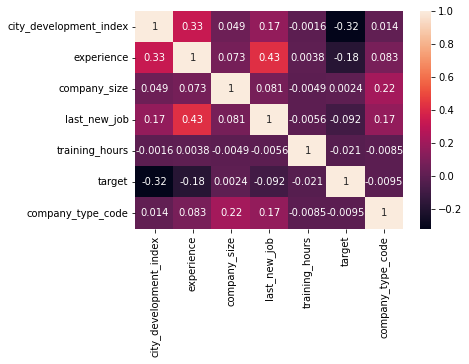

In [ ]:
import seaborn as sns

sns.heatmap(df.corr(), annot = True)

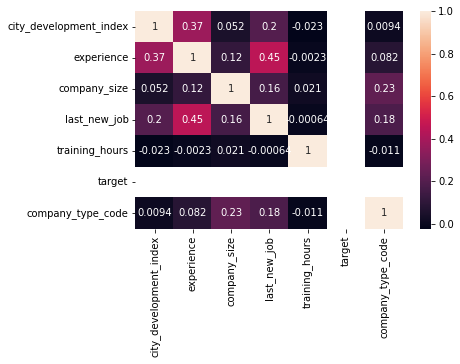

In [ ]:
sns.heatmap(df[df['target']==1].corr(), annot = True)

# Scatter Plot

## Usando Pandas

Visualizando scatter plot de todos os atributos (par a par)


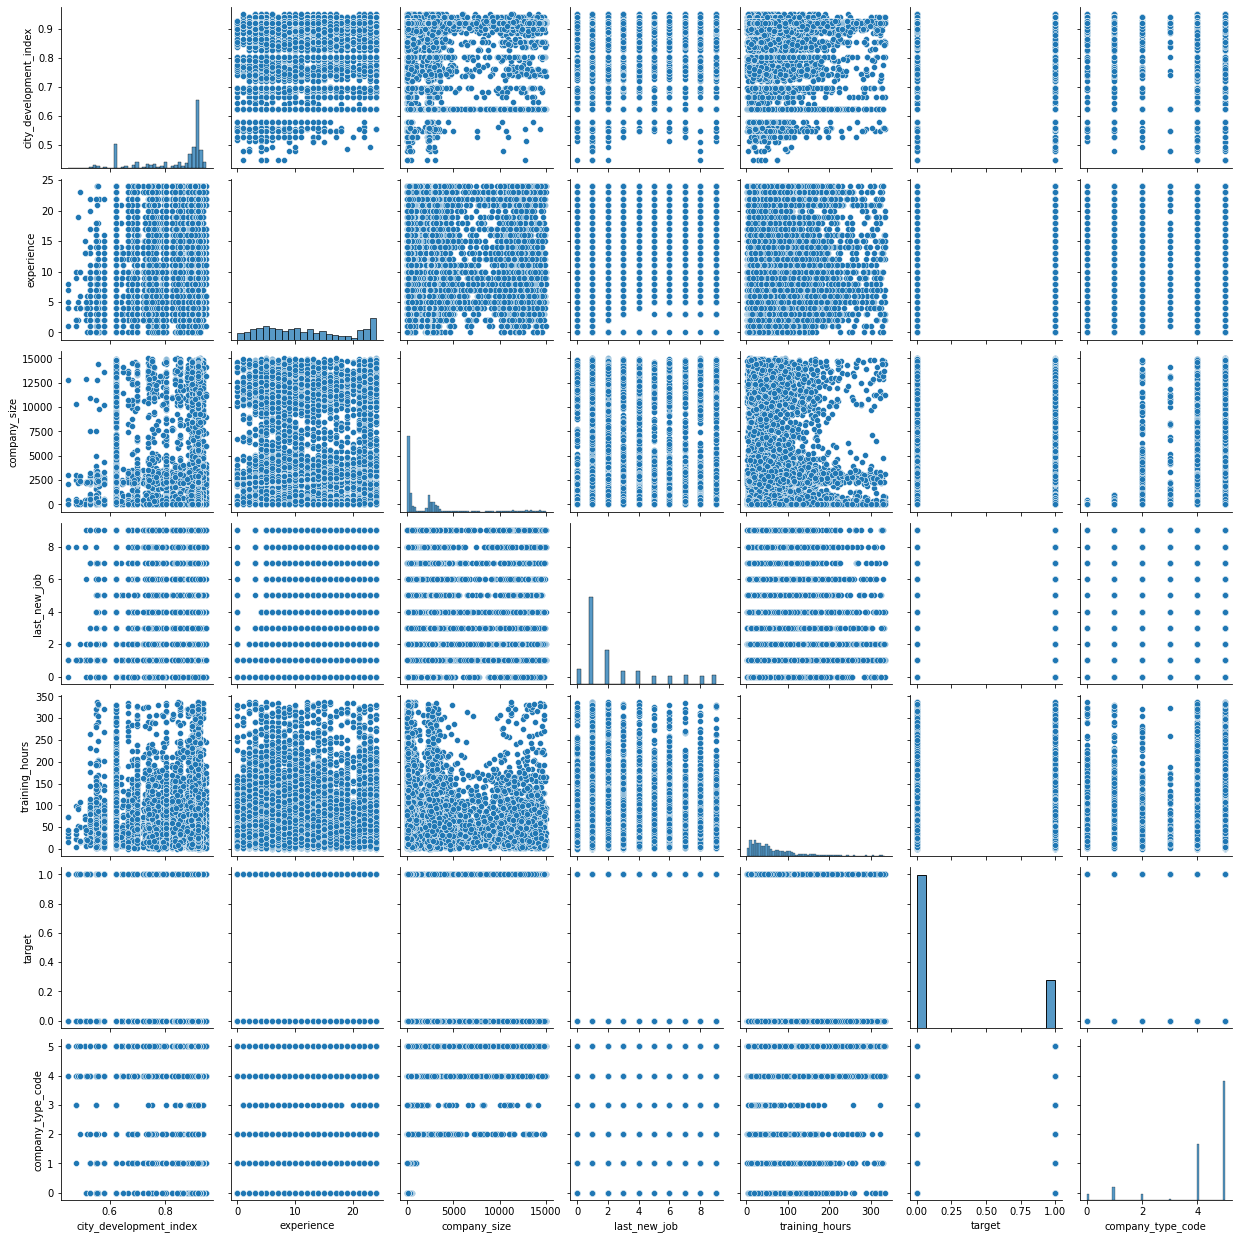

In [ ]:
sns.pairplot(df)

Como vemos, valores numéricos que não são contínuos não são bons para serem analisados no scatterplot. Vamos agora analisar o pairplot dos atributos `experience`, `company_size` e `training_hours`.

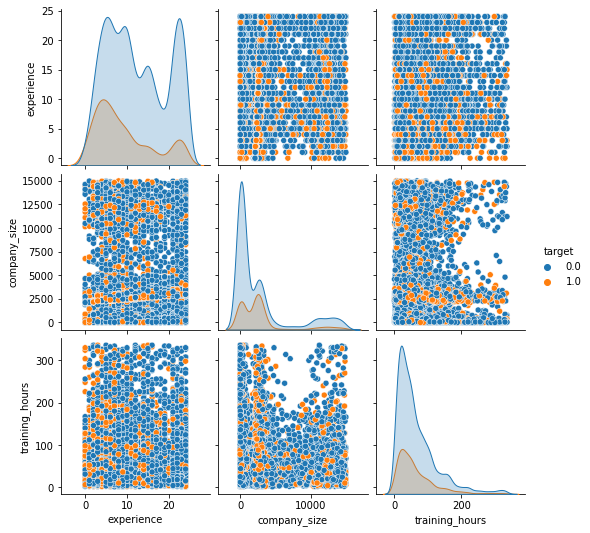

In [ ]:
sns.pairplot(df[['experience', 'company_size', 'training_hours', 'target']],hue='target')

É possível ver que **talvez** exista uma relação entre as pessoas que pretendem mudar de emprego e as pessoas que receberam menos horas de treinamento e possuem menos experiência, mas não tem como tirar conclusões neste momento.

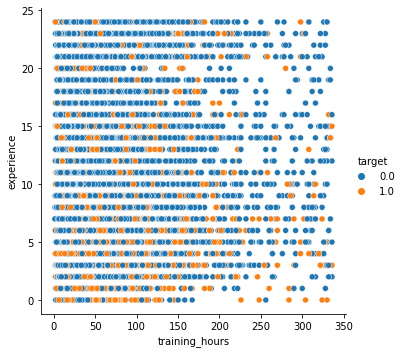

In [ ]:
sns.relplot(x="training_hours", y="experience", data=df, kind='scatter', hue='target');

# Análise das Coordenadas Paralelas

In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(df)
fig.show()

É quase impossível visualizar o gráfico das coordenadas paralelas devido à grande quantidade de dados. Vamos tirar uma amostra aleatória do dataset para tentar analisar melhor.

In [ ]:
df_sample = df.sample(n = 500, random_state=1)
df_sample

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,company_type_code,company_size_cat
2432,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,4049,Pvt Ltd,4,192,1.0,5,1000-4999
717,city_128,0.527,Male,Has relevent experience,Part time course,Masters,STEM,8,64,Pvt Ltd,7,37,0.0,5,50-99
7995,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,3564,Pvt Ltd,8,22,0.0,5,1000-4999
7840,city_160,0.920,Male,No relevent experience,Full time course,Masters,STEM,14,2872,Public Sector,4,36,0.0,4,1000-4999
5281,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,Humanities,22,93,Pvt Ltd,2,18,0.0,5,50-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4839,city_7,0.647,Male,No relevent experience,Full time course,Graduate,STEM,4,2239,Public Sector,0,133,0.0,4,1000-4999
9038,city_16,0.910,Male,Has relevent experience,no_enrollment,Masters,STEM,23,4684,Public Sector,1,96,0.0,4,1000-4999
9527,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,Humanities,3,2437,Public Sector,3,5,1.0,4,1000-4999
6268,city_73,0.754,Male,Has relevent experience,Part time course,Graduate,STEM,4,2316,Public Sector,1,35,0.0,4,1000-4999


In [ ]:
fig = px.parallel_coordinates(df_sample)
fig.show()

In [ ]:
px.parallel_categories(df_sample)

# Clustering com Coordenadas Paralelas e Redes k-NNG

In [ ]:
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,company_type_code,company_size_cat
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,23,2934,Public Sector,1,36,1.0,4,1000-4999
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,58,Pvt Ltd,6,47,0.0,5,50-99
2,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,23,76,Funded Startup,4,8,0.0,1,50-99
3,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,9,Pvt Ltd,6,18,1.0,5,<10
4,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,92,Pvt Ltd,1,46,1.0,5,50-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12534,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,403,Public Sector,3,23,0.0,4,100-499
12535,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,22,Funded Startup,1,25,0.0,1,10-49
12536,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,2641,Public Sector,1,42,1.0,4,1000-4999
12537,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,2872,Public Sector,4,52,1.0,4,1000-4999


In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
X = df[['city_development_index', 'experience', 'company_size', 'last_new_job', 'training_hours', 'target', 'company_type_code']].sample(n = 2000, random_state=1)
#X = X[X['target'] == 1].sample(n = 1000, random_state=1)

kmeans = KMeans(n_clusters=3,n_init=10,init='random',max_iter=300)
kmeans.fit(X)

X['cluster'] = kmeans.labels_
X

,city_development_index,experience,company_size,last_new_job,training_hours,target,company_type_code,cluster
2432,0.920,17,4049,4,192,1.0,5,1
717,0.527,8,64,7,37,0.0,5,2
7995,0.920,17,3564,8,22,0.0,5,1
7840,0.920,14,2872,4,36,0.0,4,1
5281,0.910,22,93,2,18,0.0,5,2
...,...,...,...,...,...,...,...,...
11343,0.624,3,67,2,58,1.0,1,2
2282,0.754,8,265,4,40,0.0,4,2
575,0.887,17,61,5,14,0.0,5,2
2422,0.527,5,68,1,43,1.0,5,2


In [ ]:
A = kneighbors_graph(X, n_neighbors=4, metric="euclidean")

A.shape

(2000, 2000)

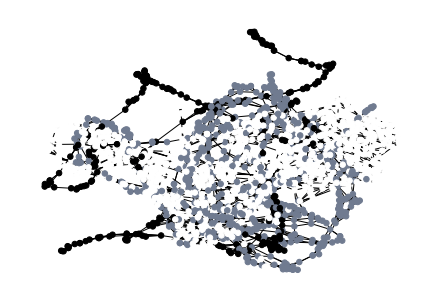

In [ ]:
import networkx as nx

G = nx.Graph(A)
nx.draw(G, node_size=30, pos=nx.spring_layout(G), node_color=X['cluster'])

In [ ]:
fig = px.parallel_coordinates(X.sample(n = 500, random_state=1), color="cluster")
fig.show()

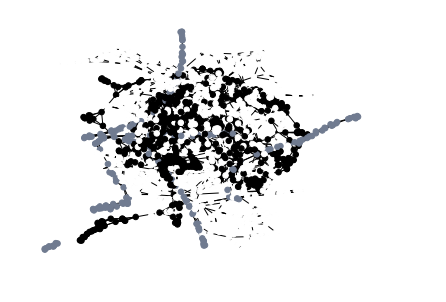

In [ ]:
X = df[['city_development_index', 'experience', 'company_size', 'last_new_job', 'training_hours', 'target', 'company_type_code']]
X = X[X['target'] == 1].sample(n = 2000, random_state=1)

kmeans = KMeans(n_clusters=3,n_init=10,init='random',max_iter=300)
kmeans.fit(X)

X['cluster'] = kmeans.labels_
A = kneighbors_graph(X, n_neighbors=4, metric="euclidean")
G = nx.Graph(A)
nx.draw(G, node_size=30, pos=nx.spring_layout(G), node_color=X['cluster'])

In [ ]:
fig = px.parallel_coordinates(X.sample(n = 500, random_state=1), color="cluster")
fig.show()

# Análise dos Componentes Principais

In [ ]:
from sklearn.decomposition import PCA

features = ['city_development_index', 'experience', 'company_size', 'last_new_job', 'training_hours', 'target', 'company_type_code']

pca = PCA(n_components=2)
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2)
    )
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
from sklearn.decomposition import PCA

features = ['city_development_index', 'experience', 'company_size', 'last_new_job', 'training_hours', 'target', 'company_type_code']

pca = PCA(n_components=2)
components = pca.fit_transform(df_norm[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2)
    )
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
components

array([[ 0.59570085,  0.44493089],
       [-0.32762761,  0.22215711],
       [-0.34552102,  0.05646645],
       ...,
       [ 0.71139421,  0.20567255],
       [ 0.64340014,  0.40535583],
       [-0.37517116,  0.25547695]])

# Redes SOM

In [ ]:
!pip install minisom

In [ ]:
train = df_norm[['city_development_index', 'experience', 'last_new_job', 'training_hours', 'company_type_code', 'target']]
X_train =  train.loc[:,'city_development_index':'company_type_code'].values
Y_train = train.loc[:, 'target'].values
Y_train

array([1., 0., 0., ..., 1., 1., 0.])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
Y_train = label.fit_transform(Y_train)

In [ ]:
features = list(train)
X_train = train.loc[:, features].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normal_sc = MinMaxScaler(feature_range = (0,1))
X_train = normal_sc.fit_transform(X_train)

In [ ]:
from minisom import MiniSom
som = MiniSom(x = 15, y = 15, input_len = 6, sigma = 2.0, learning_rate = 0.7)
som.random_weights_init(X_train)
som.train_random(data = X_train, num_iteration = 10000)

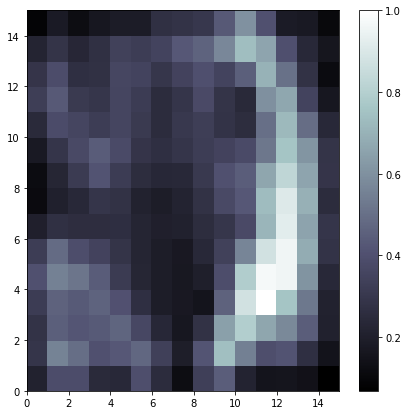

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
plt.bone()
plt.pcolor(som.distance_map().T)
plt.colorbar()
plt.savefig('./som_scale.png')

0it [00:00, ?it/s]

KeyboardInterrupt: ignored

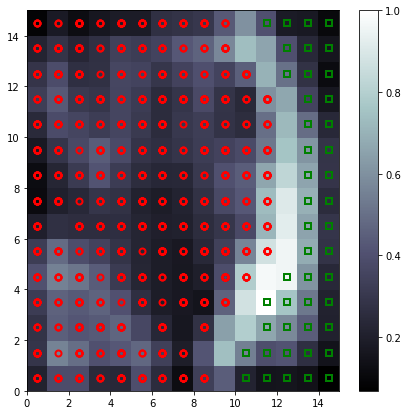

In [ ]:
from tqdm.notebook import tqdm 

plt.figure(figsize=(7, 7))
plt.bone()
plt.pcolor(som.distance_map().T)
plt.colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in tqdm(enumerate(X_train)):
    w = som.winner(x)
    plt.plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[Y_train[i]],
         markeredgecolor = colors[Y_train[i]],
         markerfacecolor = 'None',
         markersize = 6,
         markeredgewidth = 2)
    plt.savefig('som_scale_2.png')
plt.show()

# Extra

## Clustering com Coordenadas Paralelas e Redes k-NNG - Atributos Selecionados

In [ ]:
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,company_type_code,company_size_cat
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,23,2934,Public Sector,1,36,1.0,4,1000-4999
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,58,Pvt Ltd,6,47,0.0,5,50-99
2,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,23,76,Funded Startup,4,8,0.0,1,50-99
3,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,9,Pvt Ltd,6,18,1.0,5,<10
4,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,92,Pvt Ltd,1,46,1.0,5,50-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12534,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,403,Public Sector,3,23,0.0,4,100-499
12535,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,22,Funded Startup,1,25,0.0,1,10-49
12536,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,2641,Public Sector,1,42,1.0,4,1000-4999
12537,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,2872,Public Sector,4,52,1.0,4,1000-4999


In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
X = df[['experience', 'company_size', 'last_new_job', 'target']].sample(n = 2000, random_state=1)
#X = X[X['target'] == 1].sample(n = 1000, random_state=1)

kmeans = KMeans(n_clusters=4,n_init=10,init='random',max_iter=300)
kmeans.fit(X)

X['cluster'] = kmeans.labels_
X

,experience,company_size,last_new_job,target,cluster
2432,17,4049,4,1.0,2
717,8,64,7,0.0,1
7995,17,3564,8,0.0,2
7840,14,2872,4,0.0,2
5281,22,93,2,0.0,1
...,...,...,...,...,...
11343,3,67,2,1.0,1
2282,8,265,4,0.0,1
575,17,61,5,0.0,1
2422,5,68,1,1.0,1


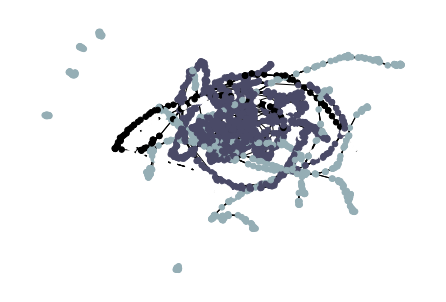

In [ ]:
import networkx as nx
A = kneighbors_graph(X, n_neighbors=7, metric="euclidean")
G = nx.Graph(A)
nx.draw(G, node_size=30, pos=nx.spring_layout(G), node_color=X['cluster'])

In [ ]:
fig = px.parallel_coordinates(X.sample(n = 500, random_state=1), color="cluster")
fig.show()